
=== Your Annual Carbon Footprint ===
🔹 Transport: 5870.0 kg CO2
🔹 Home Energy: 12862.1 kg CO2
🔹 Diet: 912.5 kg CO2
🔹 Shopping: 10.0 kg CO2
🔹 Waste: 956.8 kg CO2

🌍 Total: 20611.4 kg CO2/year
🌐 Earths Needed: 10.31

🌳 To offset your emissions:
   • Plant 947 trees OR
   • Purchase offsets for $206.11 USD/year

💡 Footprint Reduction Plan:
  ✓ Switch to an electric vehicle: saves 2935.0 kg CO2/year
  ✓ Carpool or bike 2 days/week: saves 880.5 kg CO2/year
  ✓ Switch to renewable energy options like LED lighting. Try opening the window when it's hot. Wash clothes with cold water: saves 9003.5 kg CO2/year
  ✓ Upgrade to energy-efficient appliances: saves 2572.4 kg CO2/year

✨ Reduced Footprint: 5220.0 kg CO2/year (74.7% less)

📊 Generating emissions chart...


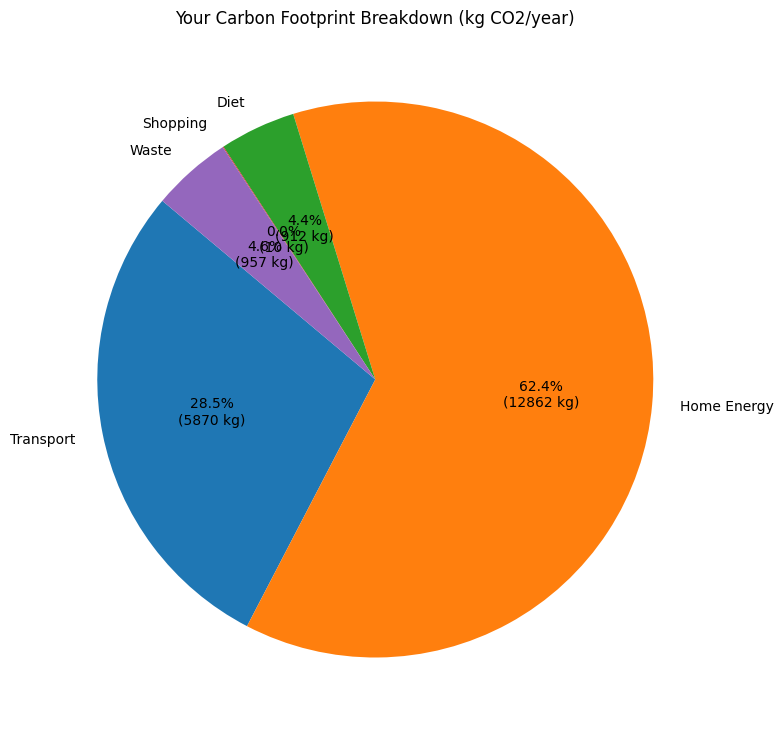

In [6]:
import matplotlib.pyplot as plt
from enum import Enum
from typing import Dict, Tuple, List

# === ENUMS ===
class DietType(Enum):
    MEAT_HEAVY = "meat_heavy"
    AVERAGE = "average"
    PLANT_BASED = "plant_based"

class FuelType(Enum):
    GASOLINE = "gasoline"
    DIESEL = "diesel"
    ELECTRIC = "electric"
    HYBRID = "hybrid"

# === EMISSION FACTORS (kg CO2) ===
EMISSION_FACTORS = {
    "transport": {
        FuelType.GASOLINE.value: 8.89,
        FuelType.DIESEL.value: 10.16,
        FuelType.ELECTRIC.value: 0.05,
        FuelType.HYBRID.value: 4.45,
        "transit": 0.2,
        "flight": 0.25
    },
    "electricity": {
        "national_average": 0.92,
        "renewable": 0.05
    },
    "natural_gas": 5.3,
    "diet": {
        DietType.MEAT_HEAVY.value: 3.3,
        DietType.AVERAGE.value: 2.5,
        DietType.PLANT_BASED.value: 1.5
    },
    "goods": 0.005,
    "waste": {
        "landfill": 0.80,
        "recycling_offset": 0.50
    },
    "offsets": {
        "tree_annual_absorption": 21.77,
        "cost_per_ton": 10
    }
}

# === EMISSIONS CALCULATION FUNCTIONS ===
def calculate_transport_emissions(miles_per_week: float, mpg: float, fuel_type: str, 
                                  transit_miles: float = 0, flight_miles: float = 0) -> float:
    emissions = 0
    if fuel_type in [FuelType.GASOLINE.value, FuelType.DIESEL.value, FuelType.HYBRID.value]:
        gallons_per_year = (miles_per_week * 52) / mpg
        emissions += gallons_per_year * EMISSION_FACTORS["transport"][fuel_type]
    elif fuel_type == FuelType.ELECTRIC.value:
        emissions += miles_per_week * 52 * EMISSION_FACTORS["transport"][fuel_type]

    emissions += transit_miles * 52 * EMISSION_FACTORS["transport"]["transit"]
    emissions += flight_miles * EMISSION_FACTORS["transport"]["flight"]
    return emissions

def calculate_energy_emissions(electricity_kwh_month: float, gas_therms_month: float, 
                               renewable_energy: bool = False) -> float:
    electricity_factor = EMISSION_FACTORS["electricity"]["renewable"] if renewable_energy \
                         else EMISSION_FACTORS["electricity"]["national_average"]
    electricity_annual = electricity_kwh_month * 12 * electricity_factor
    gas_annual = gas_therms_month * 12 * EMISSION_FACTORS["natural_gas"]
    return electricity_annual + gas_annual

def calculate_diet_emissions(diet_type: str) -> float:
    return 365 * EMISSION_FACTORS["diet"][diet_type]

def calculate_goods_emissions(annual_spending: float) -> float:
    return annual_spending * EMISSION_FACTORS["goods"]

def calculate_waste_emissions(landfill_lbs_per_week: float, recycled_lbs_per_week: float) -> float:
    landfill_emissions = landfill_lbs_per_week * 52 * EMISSION_FACTORS["waste"]["landfill"]
    recycling_savings = recycled_lbs_per_week * 52 * EMISSION_FACTORS["waste"]["recycling_offset"]
    return max(0, landfill_emissions - recycling_savings)

# === OFFSET CALCULATIONS ===
def calculate_offset_requirements(total_emissions_kg: float) -> Tuple[int, float]:
    trees_needed = int(total_emissions_kg / EMISSION_FACTORS["offsets"]["tree_annual_absorption"] + 0.5)
    cost_usd = (total_emissions_kg / 1000) * EMISSION_FACTORS["offsets"]["cost_per_ton"]
    return trees_needed, cost_usd

# === SUGGESTIONS FOR REDUCTIONS ===
def suggest_reductions(user_data: Dict, current_emissions: Dict) -> Tuple[List[Tuple[str, float]], float]:
    suggestions = []

    if current_emissions["Transport"] > 2000:
        if user_data["fuel_type"] in [FuelType.GASOLINE.value, FuelType.DIESEL.value]:
            suggestions.append(("Switch to an electric vehicle", current_emissions["Transport"] * 0.5))
        suggestions.append(("Carpool or bike 2 days/week", current_emissions["Transport"] * 0.15))

    if current_emissions["Home Energy"] > 3000:
        if not user_data["renewable_energy"]:
            suggestions.append(("Switch to renewable energy options like LED lighting. Try opening the window when it's hot. Wash clothes with cold water", current_emissions["Home Energy"] * 0.7))
        suggestions.append(("Upgrade to energy-efficient appliances", current_emissions["Home Energy"] * 0.2))

    if user_data["diet_type"] == DietType.MEAT_HEAVY.value:
        suggestions.append(("Eat less red meat, try chicken, tofu, plant based milk, locally ground produce, chickpeas, etc", 
            365 * (EMISSION_FACTORS["diet"][DietType.MEAT_HEAVY.value] - 
                   EMISSION_FACTORS["diet"][DietType.AVERAGE.value])))

    if current_emissions["Shopping"] > 1000:
        suggestions.append(("Reduce consumer spending by 20%", current_emissions["Consumer Goods"] * 0.2))

    total_savings = sum(s[1] for s in suggestions)
    return suggestions, total_savings

# === VISUALIZATION ===
def generate_emissions_chart(categories: Dict[str, float]):
    filtered = {k: v for k, v in categories.items() if v > 0}
    if not filtered:
        print("No emissions to show.")
        return

    labels = list(filtered.keys())
    values = list(filtered.values())

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p*sum(values)/100:.0f} kg)',
            startangle=140, textprops={'fontsize': 10})
    plt.title("Your Carbon Footprint Breakdown (kg CO2/year)")
    plt.tight_layout()
    plt.show()

# === DISPLAY RESULTS ===
def estimate_earths_needed(footprint_kg: float) -> float:
    return round(footprint_kg / 2000, 2)

def display_results(emissions: Dict[str, float], suggestions: List[Tuple[str, float]], 
                    total_savings: float):
    total_emissions = sum(emissions.values())
    trees, cost = calculate_offset_requirements(total_emissions)

    print("\n=== Your Annual Carbon Footprint ===")
    for category, kg in emissions.items():
        print(f"🔹 {category}: {kg:.1f} kg CO2")

    print(f"\n🌍 Total: {total_emissions:.1f} kg CO2/year")
    print(f"🌐 Earths Needed: {estimate_earths_needed(total_emissions)}")

    print(f"\n🌳 To offset your emissions:")
    print(f"   • Plant {trees} trees OR")
    print(f"   • Purchase offsets for ${cost:.2f} USD/year")

    if suggestions:
        print("\n💡 Footprint Reduction Plan:")
        for desc, saved in suggestions:
            print(f"  ✓ {desc}: saves {saved:.1f} kg CO2/year")

        reduced = total_emissions - total_savings
        print(f"\n✨ Reduced Footprint: {reduced:.1f} kg CO2/year "
              f"({(total_savings / total_emissions * 100):.1f}% less)")

# === MAIN PROGRAM ===
def main():
    try:
        user_data = {
            "miles_per_week": float(input("Enter miles driven per week: ")),
            "mpg": float(input("Enter your vehicle's MPG: ")),
            "fuel_type": input("Enter fuel type (gasoline, diesel, electric, hybrid): ").lower(),
            "transit_miles": float(input("Enter weekly public transit miles: ")),
            "flight_miles": float(input("Enter annual flight miles: ")),
            "electricity_kwh_month": float(input("Enter average monthly electricity usage (kWh): ")),
            "gas_therms_month": float(input("Enter average monthly natural gas usage (therms): ")),
            "renewable_energy": input("Do you use renewable energy? (yes/no): ").strip().lower() == "yes",
            "diet_type": input("Enter your diet type (meat_heavy, average, plant_based): ").lower(),
            "annual_spending": float(input("Enter annual shopping spending (USD): ")),
            "waste_landfill_lbs_week": float(input("Enter weekly landfill waste (lbs): ")),
            "waste_recycled_lbs_week": float(input("Enter weekly recycled waste (lbs): "))
        }

        emissions = {
            "Transport": calculate_transport_emissions(
                user_data["miles_per_week"], user_data["mpg"], user_data["fuel_type"],
                user_data["transit_miles"], user_data["flight_miles"]),
            "Home Energy": calculate_energy_emissions(
                user_data["electricity_kwh_month"], user_data["gas_therms_month"],
                user_data["renewable_energy"]),
            "Diet": calculate_diet_emissions(user_data["diet_type"]),
            "Shopping": calculate_goods_emissions(user_data["annual_spending"]),
            "Waste": calculate_waste_emissions(
                user_data["waste_landfill_lbs_week"],
                user_data["waste_recycled_lbs_week"])
        }

        suggestions, total_savings = suggest_reductions(user_data, emissions)
        display_results(emissions, suggestions, total_savings)
        print("\n📊 Generating emissions chart...")
        generate_emissions_chart(emissions)

    except Exception as e:
        print(f"❌ An error occurred: {e}")

if __name__ == "__main__":
    main()
